In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from calculate_corrs import *
from spectrum_analysis import *

# GEVP

In [2]:
def get_spectrum(Nx, Nt, m_sq, lmbd, alpha, date):
    version = "3-1"
    
    # The number of trajectories until thermalization
    cutoff = 1000
    # The size of the blocks needed to get uncorrelated block averages
    block_size = 200
    
    C = Correlators(Nx, Nt, m_sq, lmbd, alpha, version, 32, cutoff, block_size)
    C.load(date)
    
    Spec = Spectrum(Nt, block_size)
    
    Spec.add_corrs("pipi", np.real(C.corrs["pipi"])/np.real(C.corrs["pipi"])[:,0,None])
    Spec.add_corrs("pipim0", np.real(C.corrs["pipim"][0])/np.real(C.corrs["pipim"])[0,:,0,None])
    Spec.add_corrs("ss", np.real(C.corrs["ss"])/np.real(C.corrs["ss"])[:,0,None])
    Spec.add_corrs("pipi_pipi_I0", np.real(C.corrs["pipi_pipi_I0"])/np.real(C.corrs["pipi_pipi_I0"])[:,0,None])
    Spec.add_corrs("pipi_pipi_I2", np.real(C.corrs["pipi_pipi_I2"])/np.real(C.corrs["pipi_pipi_I2"])[:,0,None])
    Spec.add_corrs("pipi_s", np.real(C.corrs["pipi_s"])/np.real(C.corrs["pipi_pipi_I0"])[:,0,None]**0.5/np.real(C.corrs["ss"])[:,0,None]**0.5)
    
    Spec.add_corrs("pipim_pipim0_I0", np.real(C.corrs["pipim_pipim_I0"][0])/np.real(C.corrs["pipim_pipim_I0"])[0,:,0,None])
    Spec.add_corrs("pipim_pipim0_I2", np.real(C.corrs["pipim_pipim_I2"][0])/np.real(C.corrs["pipim_pipim_I2"])[0,:,0,None])
    Spec.add_corrs("pipim_pipi0_I0", np.real(C.corrs["pipim_pipi_I0"][0])/np.real(C.corrs["pipim_pipim_I0"])[0,:,0,None]**0.5/np.real(C.corrs["pipi_pipi_I0"])[:,0,None]**0.5)
    Spec.add_corrs("pipim_pipi0_I2", np.real(C.corrs["pipim_pipi_I2"][0])/np.real(C.corrs["pipim_pipim_I2"])[0,:,0,None]**0.5/np.real(C.corrs["pipi_pipi_I2"])[:,0,None]**0.5)
    Spec.add_corrs("pipim_s0", np.real(C.corrs["pipim_s"][0])/np.real(C.corrs["pipim_pipim_I0"])[0,:,0,None]**0.5/np.real(C.corrs["ss"])[:,0,None]**0.5)
    
    Spec.use_matrix([["pipi_pipi_I0",   "pipi_s",   "pipim_pipi0_I0"],
                       ["pipi_s",      "ss",       "pipim_s0"],
                       ["pipim_pipi0_I0", "pipim_s0", "pipim_pipim0_I0"]])
    
    spectrum = []
    for i in range(5):
        spectrum.append(Spec.get_spectrum(i))
    
    Spec.use_matrix([["pipi_pipi_I0", "pipim_pipi0_I0"],
                     ["pipim_pipi0_I0", "pipim_pipim0_I0"]])
    
    spectrum_I2 = []
    for i in range(5):
        spectrum_I2.append(Spec.get_spectrum(i))
    
    Spec.get_energy("pipi")
    Spec.get_energy("pipim0")
    pion_mass = Spec.energies["pipi"]
    pion_mass_m0 = Spec.energies["pipim0"]
    
    del C
    del Spec
    
    return spectrum, spectrum_I2, pion_mass, pion_mass_m0

In [3]:
# Extent of the lattice
Nx = 16
Nt = 128
# The parameters in the action
m_sq = -1020.
lmbd = 10000.0
alpha = 0.007

spectrum16, spectrum16_I2, pion_mass16, pion_mass16_m0 = get_spectrum(Nx,Nt,m_sq,lmbd,alpha,"2023-10-11")

Loading output_data/measurements_16x128_msq_-1020.0_lmbd_10000.0_alph_0.007_2023-05-30_3-1.bin
Loading output_data/measurements_16x128_msq_-1020.0_lmbd_10000.0_alph_0.007_2023-06-01_3-1.bin
Loading output_data/measurements_16x128_msq_-1020.0_lmbd_10000.0_alph_0.007_2023-06-02_3-1.bin
Loading output_data/measurements_16x128_msq_-1020.0_lmbd_10000.0_alph_0.007_2023-06-03_3-1.bin
Loading output_data/measurements_16x128_msq_-1020.0_lmbd_10000.0_alph_0.007_2023-06-04_3-1.bin
Loading output_data/measurements_16x128_msq_-1020.0_lmbd_10000.0_alph_0.007_2023-06-06_3-1.bin
Loading output_data/measurements_16x128_msq_-1020.0_lmbd_10000.0_alph_0.007_2023-06-07_3-1.bin
Loading output_data/measurements_16x128_msq_-1020.0_lmbd_10000.0_alph_0.007_2023-06-09_3-1.bin
Loading output_data/measurements_16x128_msq_-1020.0_lmbd_10000.0_alph_0.007_2023-06-11_3-1.bin
Loading output_data/measurements_16x128_msq_-1020.0_lmbd_10000.0_alph_0.007_2023-06-14_3-1.bin
Loading output_data/measurements_16x128_msq_-1020.

In [4]:
# Extent of the lattice
Nx = 8
Nt = 128
# The parameters in the action
m_sq = -1050.
lmbd = 10000.0
alpha = 0.05

spectrum8, spectrum8_I2, pion_mass8, pion_mass8_m0 = get_spectrum(Nx,Nt,m_sq,lmbd,alpha,"2023-10-11")

Loading output_data/measurements_8x128_msq_-1050.0_lmbd_10000.0_alph_0.05_2023-05-30_3-1.bin
Loading output_data/measurements_8x128_msq_-1050.0_lmbd_10000.0_alph_0.05_2023-05-31_3-1.bin
pipi energy is 0.42695187187486167/a +- 0.006044129385992621/a
pipim0 energy is 0.8550798441226223/a +- 0.004192905558705306/a


In [5]:
Nx = 12
spectrumV2, spectrumV2_I2, pion_massV2, pion_massV2_m0 = get_spectrum(Nx,Nt,m_sq,lmbd,alpha,"2023-10-26")

Loading output_data/measurements_12x128_msq_-1050.0_lmbd_10000.0_alph_0.05_2023-10-13_3-1.bin
Loading output_data/measurements_12x128_msq_-1050.0_lmbd_10000.0_alph_0.05_2023-10-16_3-1.bin
Loading output_data/measurements_12x128_msq_-1050.0_lmbd_10000.0_alph_0.05_2023-10-17_3-1.bin
Loading output_data/measurements_12x128_msq_-1050.0_lmbd_10000.0_alph_0.05_2023-10-19_3-1.bin
Loading output_data/measurements_12x128_msq_-1050.0_lmbd_10000.0_alph_0.05_2023-10-20_3-1.bin
Loading output_data/measurements_12x128_msq_-1050.0_lmbd_10000.0_alph_0.05_2023-10-24_3-1.bin
Loading output_data/measurements_12x128_msq_-1050.0_lmbd_10000.0_alph_0.05_2023-10-25_3-1.bin
pipi energy is 0.4369844320586281/a +- 0.007140974692930349/a
pipim0 energy is 0.6594239638404588/a +- 0.004089314784070418/a


In [6]:
Nx = 16
spectrumV3, spectrumV3_I2, pion_massV3, pion_massV3_m0 = get_spectrum(Nx,Nt,m_sq,lmbd,alpha,"2023-11-02")

Loading output_data/measurements_16x128_msq_-1050.0_lmbd_10000.0_alph_0.05_2023-10-13_3-1.bin
Loading output_data/measurements_16x128_msq_-1050.0_lmbd_10000.0_alph_0.05_2023-10-16_3-1.bin
Loading output_data/measurements_16x128_msq_-1050.0_lmbd_10000.0_alph_0.05_2023-10-17_3-1.bin
Loading output_data/measurements_16x128_msq_-1050.0_lmbd_10000.0_alph_0.05_2023-10-19_3-1.bin
Loading output_data/measurements_16x128_msq_-1050.0_lmbd_10000.0_alph_0.05_2023-10-20_3-1.bin
Loading output_data/measurements_16x128_msq_-1050.0_lmbd_10000.0_alph_0.05_2023-10-23_3-1.bin
Loading output_data/measurements_16x128_msq_-1050.0_lmbd_10000.0_alph_0.05_2023-10-24_3-1.bin
Loading output_data/measurements_16x128_msq_-1050.0_lmbd_10000.0_alph_0.05_2023-10-25_3-1.bin
Loading output_data/measurements_16x128_msq_-1050.0_lmbd_10000.0_alph_0.05_2023-10-26_3-1.bin
Loading output_data/measurements_16x128_msq_-1050.0_lmbd_10000.0_alph_0.05_2023-10-29_3-1.bin
Loading output_data/measurements_16x128_msq_-1050.0_lmbd_100

In [51]:
def plot_spec(spec, m_pi, m_pi_m0, E0, E1, fig, ax, t_end=5, states=[], label_override=""):
    plt.rcParams.update({
        "text.usetex": True,
        "font.family": "DejaVu Sans",        
        'font.weight' : 'normal',
        'font.size'   : 32
    })
    
    fig.set_figwidth(20)
    fig.set_figheight(10)
    
    fact = 1/m_pi
    
    spec = np.array(spec)
    if(states==[]):
        states=range(spec.shape[3])
    for i in states:
        if(label_override=="eig"):
            label = f"{np.round(spec[0,0,1:,i]/np.sum(spec[0,0,1:,i]**2)**0.5,2)}"
        else:
            label = label_override
        ax.errorbar(range(t_end), spec[:t_end,0,0,i]*fact, yerr=spec[:t_end,1,0,i]*fact, linewidth=3, label=label)
    
    xend = min(spec.shape[0], t_end) - 1
    if(m_pi_m0):
        ax.hlines(2*m_pi*fact, 0, xend, linestyles="dotted", linewidth=6, label="$2E_{\pi,p=0}$ and $2E_{\pi,p=1}$")
    if(m_pi_m0):
        ax.hlines(2*m_pi_m0*fact, 0, xend, linewidth=6, linestyles="dotted")
    if(E0):
        ax.hlines(E0, 0, xend, linewidth=3, linestyles="dashed", label="QCD Spectrum")
    if(E1):
        ax.hlines(E1, 0, xend, linewidth=3, linestyles="dashed")
    
    ax.legend()
    ax.legend(loc=[0.05,0.35])
    #ax.legend(loc=[0.05,0.05])
    
    ax.set_xlabel("$t$")
    ax.set_ylabel("$E/m_\pi$")
    #fig.suptitle("Energy Eigenvalues vs Initial $t$")
    
    fig.savefig("energies.pdf")

In [8]:
a = 1.023
m_pi_RBC = 0.1426
E0_I0 = 0.271*a/m_pi_RBC
E1_I0 = 0.531*a/m_pi_RBC
E2_I0 = 0.695*a/m_pi_RBC

E0_I2 = 0.281*a/m_pi_RBC
E1_I2 = 0.608*a/m_pi_RBC

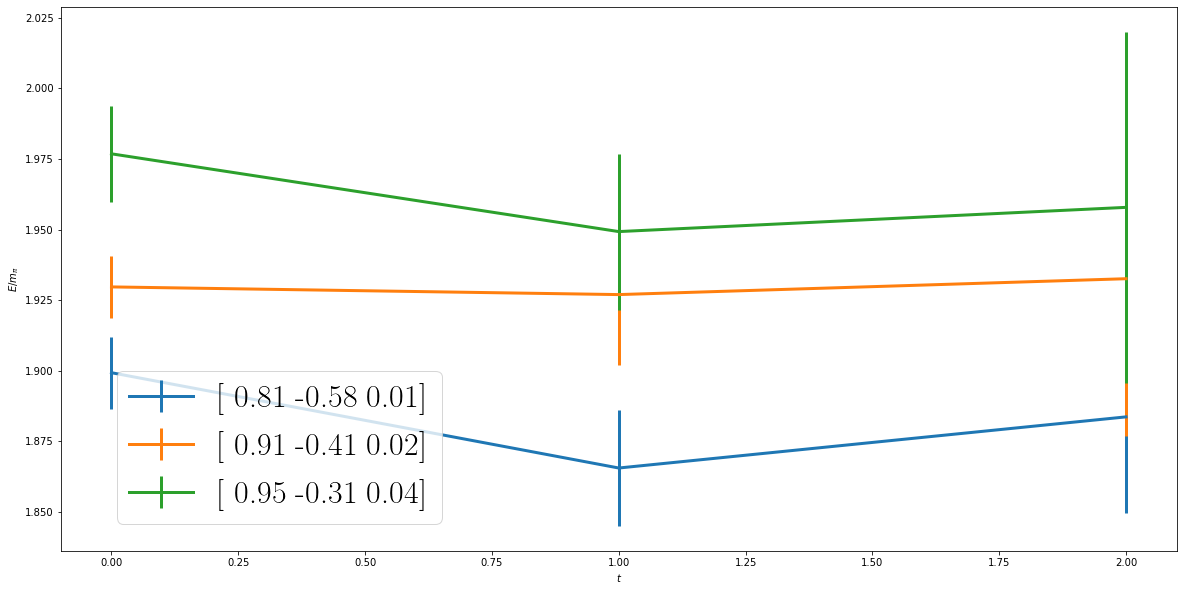

In [9]:
fig,ax = plt.subplots()

state = [0]
plot_spec(spectrum8, pion_mass8, 0, 0, 0, fig, ax, 3, state)
plot_spec(spectrumV2, pion_massV2, 0, 0, 0, fig, ax, 3, state)
plot_spec(spectrumV3, pion_massV3, 0, 0, 0, fig, ax, 3, state)

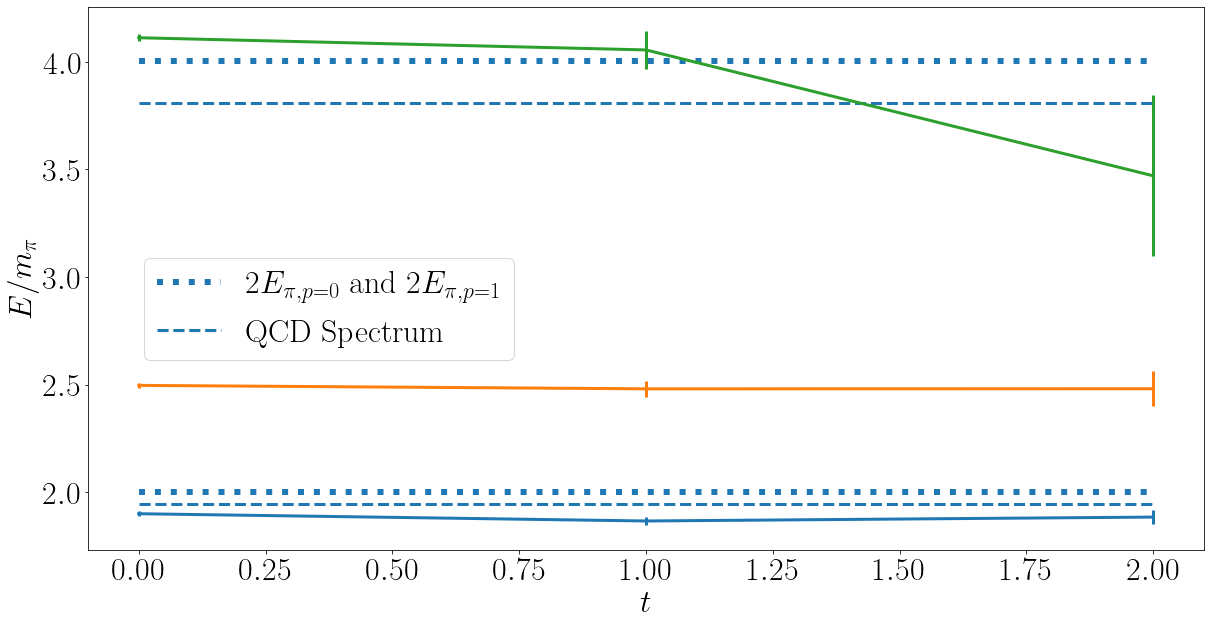

In [52]:
fig,ax = plt.subplots()

plot_spec(spectrum8, pion_mass8, pion_mass8_m0, E0_I0, E1_I0, fig, ax, 3)

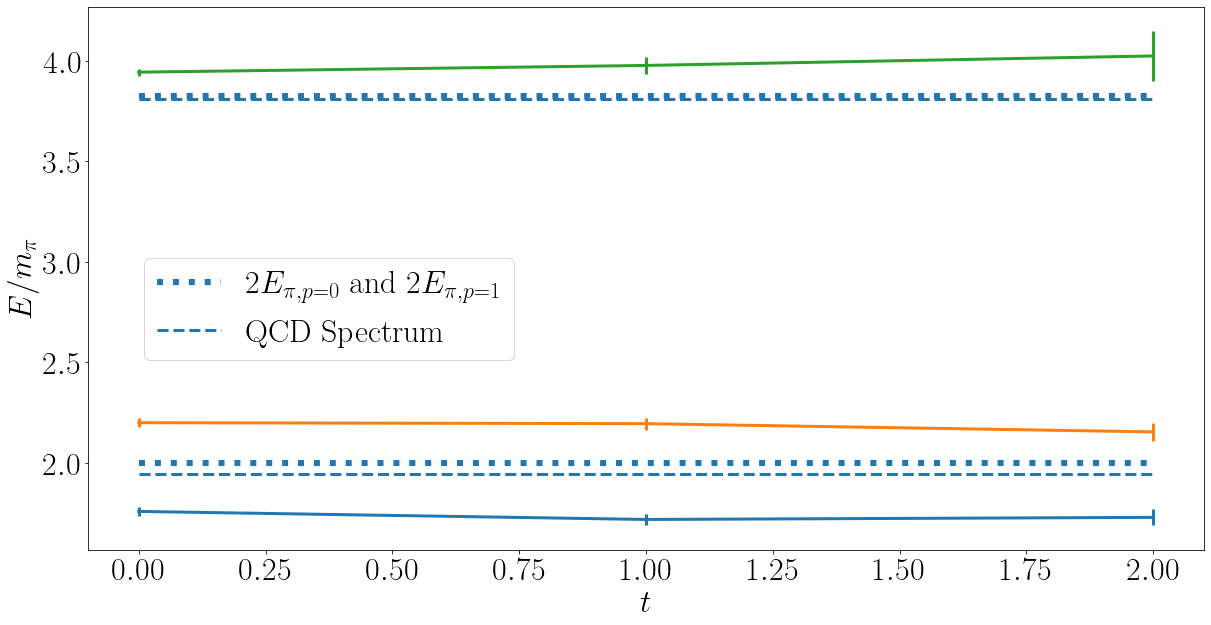

In [53]:
fig,ax = plt.subplots()

plot_spec(spectrum16, pion_mass16, pion_mass16_m0, E0_I0, E1_I0, fig, ax, 3)

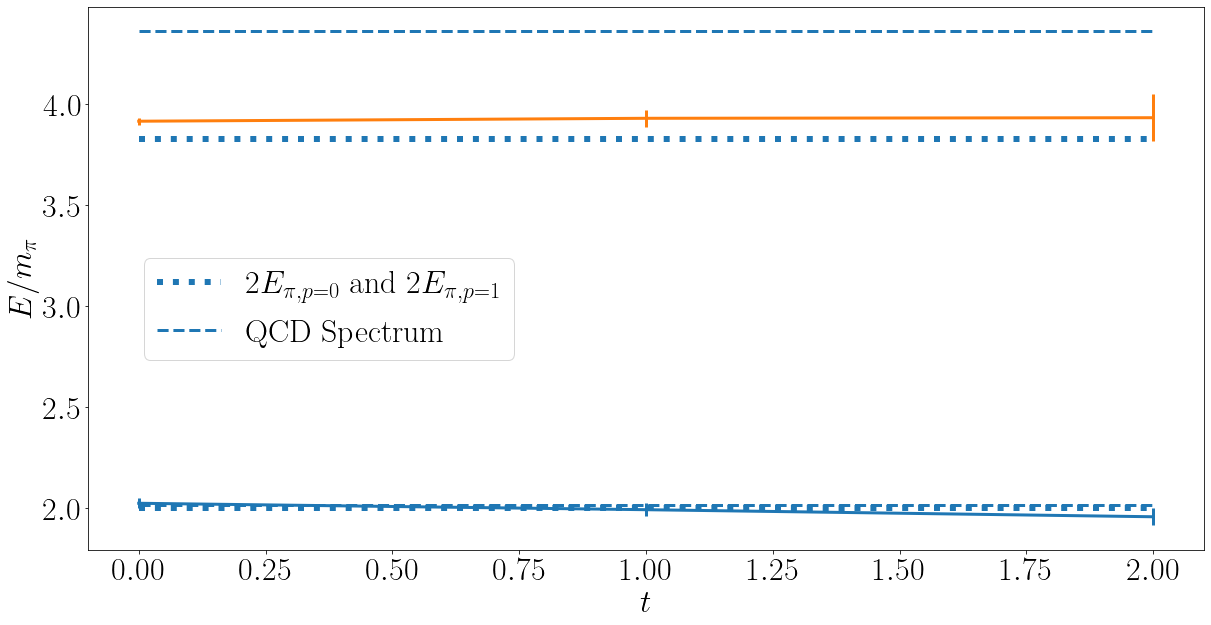

In [54]:
fig,ax = plt.subplots()

plot_spec(spectrum16_I2, pion_mass16, pion_mass16_m0, E0_I2, E1_I2, fig, ax, 3)

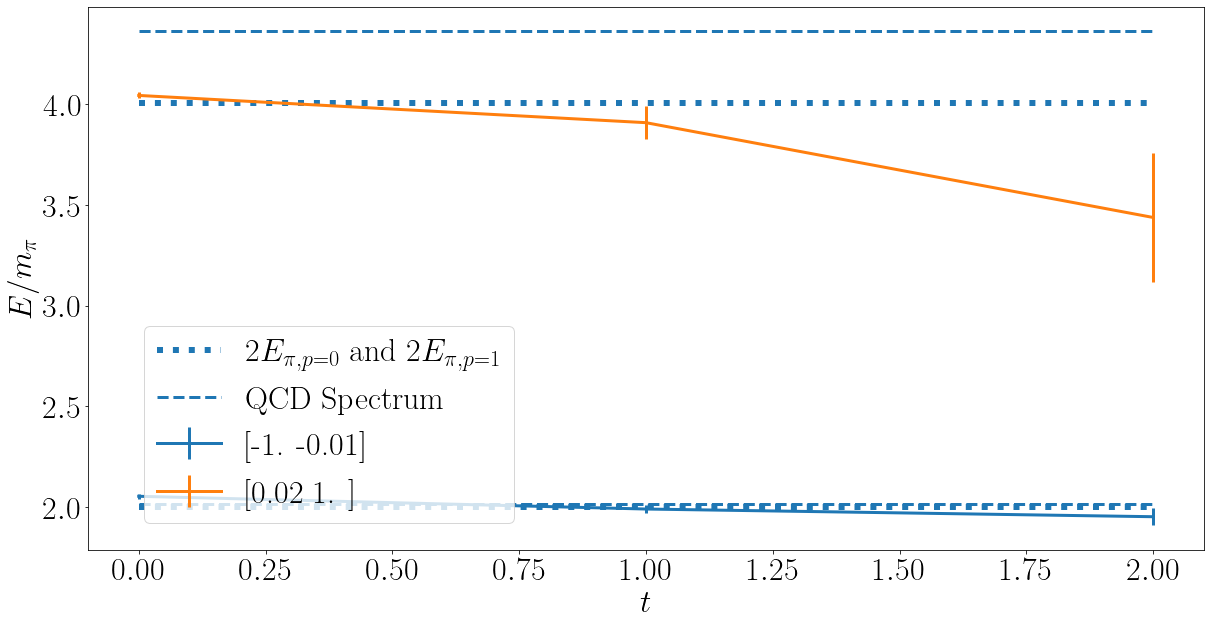

In [13]:
fig,ax = plt.subplots()

plot_spec(spectrum8_I2, pion_mass8, pion_mass8_m0, E0_I2, E1_I2, fig, ax, 3)

In [14]:
print(np.array(spectrum16)[0,0,0]/pion_mass16)
print(np.array(spectrum16)[0,1,0]/pion_mass16)

[1.75834169 2.19973334 3.94399836]
[0.02121875 0.02106173 0.01709044]


In [15]:
print(np.array(spectrum16_I2)[0,0,0]/pion_mass16)
print(np.array(spectrum16_I2)[0,1,0]/pion_mass16)

[2.02340177 3.91597418]
[0.02408716 0.01692643]


# Parameters vs $\lambda$

In [27]:
import pandas as pd

In [28]:
df8=pd.read_csv("results/simulation_results_8x16_10_06_23.csv")
df12=pd.read_csv("results/simulation_results_12x24_10_06_23.csv")
df16=pd.read_csv("results/simulation_results_16x32_10_06_23.csv")

In [43]:
# Shift points
def plot_params_vs_lambda(lattice_size):
    plt.rcParams.update({
        "text.usetex": True,
        "font.family": "DejaVu Sans",        
        'font.weight' : 'normal',
        'font.size'   : 32
    })
    
    fig,ax = plt.subplots()
    fig.set_figwidth(20)
    fig.set_figheight(10)
    
    if lattice_size=="8x8x8x16":
        msq_ratio = 0.105
        alpha = 0.05
        df = df8
    elif lattice_size=="12x12x12x24":
        msq_ratio = 0.103
        alpha = 0.015
        df = df12
    elif lattice_size=="16x16x16x32":
        msq_ratio = 0.102
        alpha = 0.007
        df = df16
    else:
        print("Error: Unexpected lattice size!")
        return
    
    lmbd = 1000.0
    a=df.loc[(df['lattice size']==lattice_size) & (df['lambda']==lmbd) & (df['m^2']==-round(msq_ratio*lmbd,3)) & (df['alpha']==alpha)]
    ax.errorbar(x=["$\langle\phi_0\\rangle$", "$m_\pi$", "$m_\sigma^{eff}$", "$F_\pi$"], 
                y=[a['sigma vev'].to_list()[0], a['pion mass'].to_list()[0], a['sigma effective mass'].to_list()[0], a['fpi'].to_list()[0]], 
                yerr=[a['sigma vev error'].to_list()[0], a['pion mass error'].to_list()[0], a['sigma effective mass error'].to_list()[0], a['fpi error'].to_list()[0]], 
                label=f'$\lambda={lmbd}$', fmt='o', ms=20)

    lmbd = 10000.0
    a=df.loc[(df['lattice size']==lattice_size) & (df['lambda']==lmbd) & (df['m^2']==-round(msq_ratio*lmbd,3)) & (df['alpha']==alpha)]
    ax.errorbar(x=["$\langle\phi_0\\rangle$", "$m_\pi$", "$m_\sigma^{eff}$", "$F_\pi$"], 
                y=[a['sigma vev'].to_list()[0], a['pion mass'].to_list()[0], a['sigma effective mass'].to_list()[0], a['fpi'].to_list()[0]], 
                yerr=[a['sigma vev error'].to_list()[0], a['pion mass error'].to_list()[0], a['sigma effective mass error'].to_list()[0], a['fpi error'].to_list()[0]], 
                label=f'$\lambda={lmbd}$', fmt='o', ms=20)

    lmbd = 100000.0
    a=df.loc[(df['lattice size']==lattice_size) & (df['lambda']==lmbd) & (df['m^2']==-round(msq_ratio*lmbd,3)) & (df['alpha']==alpha)]
    ax.errorbar(x=["$\langle\phi_0\\rangle$", "$m_\pi$", "$m_\sigma^{eff}$", "$F_\pi$"], 
                y=[a['sigma vev'].to_list()[0], a['pion mass'].to_list()[0], a['sigma effective mass'].to_list()[0], a['fpi'].to_list()[0]], 
                yerr=[a['sigma vev error'].to_list()[0], a['pion mass error'].to_list()[0], a['sigma effective mass error'].to_list()[0], a['fpi error'].to_list()[0]], 
                label=f'$\lambda={lmbd}$', fmt='o', ms=20)

    ax.legend()
    #fig.suptitle(f"Observables at physical point for various $\lambda$ ({lattice_size})")

    fig.savefig("lambda_comparison.pdf", facecolor=(1, 1, 1))

In [44]:
plot_params_vs_lambda("16x16x16x32")

RuntimeError: latex was not able to process the following string:
b'$m_\\\\sigma^{\\\\text{eff}}$'

Here is the full report generated by latex:
This is pdfTeX, Version 3.141592653-2.6-1.40.22 (TeX Live 2022/dev/Debian) (preloaded format=latex)
 restricted \write18 enabled.
entering extended mode
(../0e27a3c18cf7ab68bd94c50ca34af3e5.tex
LaTeX2e <2021-11-15> patch level 1
L3 programming layer <2022-01-21>
(/usr/share/texlive/texmf-dist/tex/latex/base/article.cls
Document Class: article 2021/10/04 v1.4n Standard LaTeX document class
(/usr/share/texlive/texmf-dist/tex/latex/base/size10.clo))
(/usr/share/texlive/texmf-dist/tex/latex/type1cm/type1cm.sty)
(/usr/share/texmf/tex/latex/cm-super/type1ec.sty
(/usr/share/texlive/texmf-dist/tex/latex/base/t1cmr.fd))
(/usr/share/texlive/texmf-dist/tex/latex/base/inputenc.sty)
(/usr/share/texlive/texmf-dist/tex/latex/geometry/geometry.sty
(/usr/share/texlive/texmf-dist/tex/latex/graphics/keyval.sty)
(/usr/share/texlive/texmf-dist/tex/generic/iftex/ifvtex.sty
(/usr/share/texlive/texmf-dist/tex/generic/iftex/iftex.sty)))
(/usr/share/texlive/texmf-dist/tex/latex/underscore/underscore.sty)
(/usr/share/texlive/texmf-dist/tex/latex/base/textcomp.sty)
(/usr/share/texlive/texmf-dist/tex/latex/l3backend/l3backend-dvips.def)
No file 0e27a3c18cf7ab68bd94c50ca34af3e5.aux.
*geometry* driver: auto-detecting
*geometry* detected driver: dvips
! Undefined control sequence.
l.18 {\rmfamily $m_\sigma^{\text
                                {eff}}$}
No pages of output.
Transcript written on 0e27a3c18cf7ab68bd94c50ca34af3e5.log.




Error in callback <function install_repl_displayhook.<locals>.post_execute at 0x7fc775d2c160> (for post_execute):


RuntimeError: latex was not able to process the following string:
b'$m_\\\\sigma^{\\\\text{eff}}$'

Here is the full report generated by latex:
This is pdfTeX, Version 3.141592653-2.6-1.40.22 (TeX Live 2022/dev/Debian) (preloaded format=latex)
 restricted \write18 enabled.
entering extended mode
(../0e27a3c18cf7ab68bd94c50ca34af3e5.tex
LaTeX2e <2021-11-15> patch level 1
L3 programming layer <2022-01-21>
(/usr/share/texlive/texmf-dist/tex/latex/base/article.cls
Document Class: article 2021/10/04 v1.4n Standard LaTeX document class
(/usr/share/texlive/texmf-dist/tex/latex/base/size10.clo))
(/usr/share/texlive/texmf-dist/tex/latex/type1cm/type1cm.sty)
(/usr/share/texmf/tex/latex/cm-super/type1ec.sty
(/usr/share/texlive/texmf-dist/tex/latex/base/t1cmr.fd))
(/usr/share/texlive/texmf-dist/tex/latex/base/inputenc.sty)
(/usr/share/texlive/texmf-dist/tex/latex/geometry/geometry.sty
(/usr/share/texlive/texmf-dist/tex/latex/graphics/keyval.sty)
(/usr/share/texlive/texmf-dist/tex/generic/iftex/ifvtex.sty
(/usr/share/texlive/texmf-dist/tex/generic/iftex/iftex.sty)))
(/usr/share/texlive/texmf-dist/tex/latex/underscore/underscore.sty)
(/usr/share/texlive/texmf-dist/tex/latex/base/textcomp.sty)
(/usr/share/texlive/texmf-dist/tex/latex/l3backend/l3backend-dvips.def)
No file 0e27a3c18cf7ab68bd94c50ca34af3e5.aux.
*geometry* driver: auto-detecting
*geometry* detected driver: dvips
! Undefined control sequence.
l.18 {\rmfamily $m_\sigma^{\text
                                {eff}}$}
No pages of output.
Transcript written on 0e27a3c18cf7ab68bd94c50ca34af3e5.log.




RuntimeError: latex was not able to process the following string:
b'$m_\\\\sigma^{\\\\text{eff}}$'

Here is the full report generated by latex:
This is pdfTeX, Version 3.141592653-2.6-1.40.22 (TeX Live 2022/dev/Debian) (preloaded format=latex)
 restricted \write18 enabled.
entering extended mode
(../0e27a3c18cf7ab68bd94c50ca34af3e5.tex
LaTeX2e <2021-11-15> patch level 1
L3 programming layer <2022-01-21>
(/usr/share/texlive/texmf-dist/tex/latex/base/article.cls
Document Class: article 2021/10/04 v1.4n Standard LaTeX document class
(/usr/share/texlive/texmf-dist/tex/latex/base/size10.clo))
(/usr/share/texlive/texmf-dist/tex/latex/type1cm/type1cm.sty)
(/usr/share/texmf/tex/latex/cm-super/type1ec.sty
(/usr/share/texlive/texmf-dist/tex/latex/base/t1cmr.fd))
(/usr/share/texlive/texmf-dist/tex/latex/base/inputenc.sty)
(/usr/share/texlive/texmf-dist/tex/latex/geometry/geometry.sty
(/usr/share/texlive/texmf-dist/tex/latex/graphics/keyval.sty)
(/usr/share/texlive/texmf-dist/tex/generic/iftex/ifvtex.sty
(/usr/share/texlive/texmf-dist/tex/generic/iftex/iftex.sty)))
(/usr/share/texlive/texmf-dist/tex/latex/underscore/underscore.sty)
(/usr/share/texlive/texmf-dist/tex/latex/base/textcomp.sty)
(/usr/share/texlive/texmf-dist/tex/latex/l3backend/l3backend-dvips.def)
No file 0e27a3c18cf7ab68bd94c50ca34af3e5.aux.
*geometry* driver: auto-detecting
*geometry* detected driver: dvips
! Undefined control sequence.
l.18 {\rmfamily $m_\sigma^{\text
                                {eff}}$}
No pages of output.
Transcript written on 0e27a3c18cf7ab68bd94c50ca34af3e5.log.




<Figure size 1440x720 with 1 Axes>

# Parameters vs $m^2$

In [36]:
def plot_params_vs_msq(lattice_size, msq_start, msq_end, fig, ax):
    plt.rcParams.update({
        "text.usetex": True,
        "font.family": "DejaVu Sans",        
        'font.weight' : 'normal',
        'font.size'   : 32
    })
    
    fig.set_figwidth(20)
    fig.set_figheight(10)

    lmbd = 10000.0
    if lattice_size=="8x8x8x16":
        ax.vlines(x=-0.105, ymin=-1, ymax=2, color='black', linestyle='dotted', label='Physical Point')
        alpha = 0.05
        df = df8
    elif lattice_size=="12x12x12x24":
        ax.vlines(x=-0.103, ymin=-1, ymax=2, color='black', linestyle='dotted', label='Physical Point')
        alpha = 0.015
        df = df12
    elif lattice_size=="16x16x16x32":
        ax.vlines(x=-0.102, ymin=-1, ymax=2, color='black', linestyle='dotted', linewidth=3, label='Physical Point')
        alpha = 0.007
        df = df16
    
    a = df.loc[(df['lattice size']==lattice_size) & (df['lambda']==lmbd) & (df['alpha']==alpha)].sort_values('m^2')
    start = a['m^2'].tolist().index(msq_start)
    end = a['m^2'].tolist().index(msq_end)+1
    ax.errorbar(a['m^2'][start:end]/lmbd, a['pion mass'][start:end].abs(), yerr=a['pion mass error'][start:end], linewidth=3, label='$m_\pi$')
    sigma_fact = 1
    a = df.loc[(df['lattice size']==lattice_size) & (df['lambda']==lmbd) & (df['alpha']==alpha)].sort_values('m^2')
    ax.errorbar(a['m^2'][start:end]/lmbd, a['fpi'][start:end].abs(), yerr=a['fpi error'][start:end], linewidth=3, label='$F_\pi$')
    
    print(a['pion mass']/a['fpi'])
    print(a['sigma effective mass']/2/a['pion mass'])
    
    a = df.loc[(df['lattice size']==lattice_size) & (df['lambda']==lmbd) & (df['alpha']==alpha)].sort_values('m^2')
    #ax.errorbar(a['m^2'][start:end]/lmbd, a['fpi2'][start:end].abs(), yerr=a['fpi2 error'][start:end], label='$F_\pi$ (pion corrs)')
    
    a = df.loc[(df['lattice size']==lattice_size) & (df['lambda']==lmbd) & (df['alpha']==alpha)].sort_values('m^2')
    ax.errorbar(a['m^2'][start:end]/lmbd, a['sigma effective mass'][start:end].abs()*sigma_fact, yerr=a['sigma effective mass error'][start:end]*sigma_fact, linewidth=3, label='$m_\sigma^{eff}$')
    
    ax.legend()
    ax.legend(loc=[0.67,0.07])
    #ax.set_xlim([-0.107,-0.099])
    ax.set_ylim([0.0,1.3])#max(a['sigma effective mass'][start:end])+0.1])
    #ax.locator_params(nbins=4)
    
    ax.set_xlabel("$m^2/\lambda$")
    
    #fig.suptitle(fr"Parameters vs $m^2/\lambda$ for {lattice_size}, $\lambda$={lmbd}, $\alpha$={alpha}")
    fig.savefig("msq_plot.pdf",facecolor=(1, 1, 1))

28      0.107692
29      0.154175
30      0.225322
27      0.409714
25      0.518388
23      0.725486
21      1.033026
19      1.228446
17      1.409001
15      1.666334
13      2.044592
11      2.743852
31      3.739074
32     11.812981
33     30.959017
35    106.609781
34    216.973796
dtype: float64
28    5.017984
29    4.572104
30    4.280806
27    3.094510
25    2.587442
23    2.009990
21    1.491352
19    1.292033
17    1.125069
15    0.963517
13    0.842787
11    0.705453
31    0.600490
32    0.512021
33    0.492019
35    0.494794
34    0.494196
dtype: float64


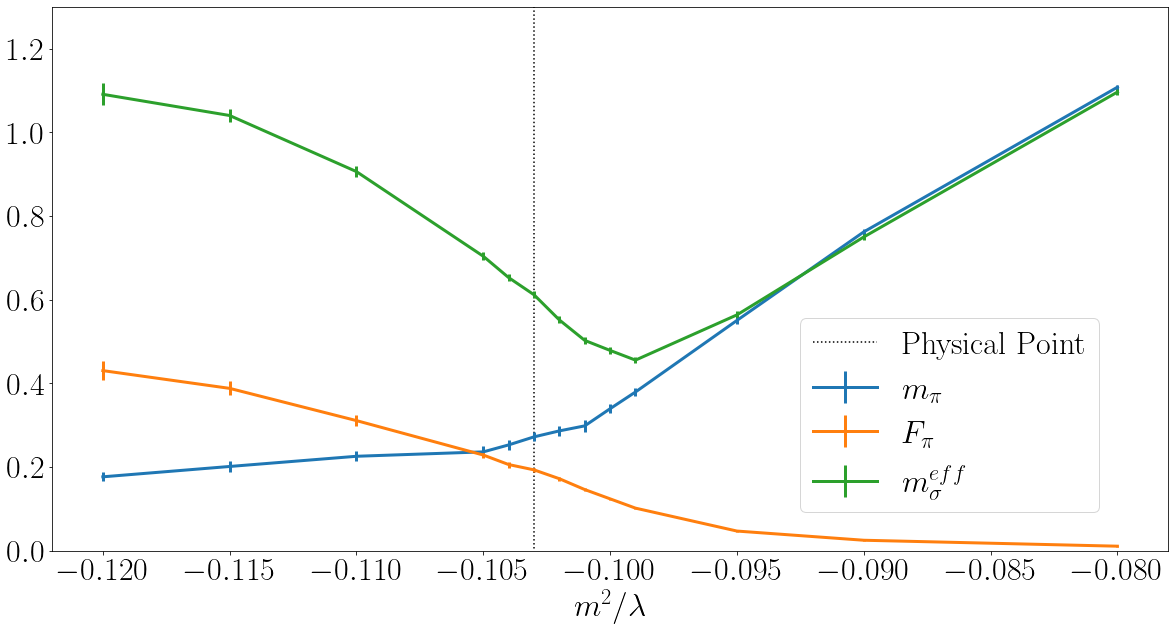

In [37]:
fig,ax = plt.subplots()

#plot_params_vs_msq("8x8x8x16", -1200., -800., fig, ax)
plot_params_vs_msq("12x12x12x24", -1200., -800., fig, ax)
#plot_params_vs_msq("16x16x16x32", -1200., -800., fig, ax)

# $\phi^2$ Distribution

In [19]:
from data_analysis_blocked import *

In [20]:
def get_psq_dist(lattice_size, lmbd):
    if lattice_size=="8x8x8x16":
        Nx = 8
        Nt = 16
        m_sq = -round(0.105*lmbd, 3)
        alpha = 0.05
    elif lattice_size=="12x12x12x24":
        Nx = 12
        Nt = 24
        m_sq = -round(0.103*lmbd, 3)
        alpha = 0.015
    elif lattice_size=="16x16x16x32":
        Nx = 16
        Nt = 32
        m_sq = -round(0.102*lmbd, 3)
        alpha = 0.007
    else:
        print("Error: Unexpected lattice size!")
        return
    
    version = "3-1"
    # The number of trajectories until thermalization
    cutoff = 3000
    block_size = 100

    # Load data
    data = LatticeData(Nx, Nt, m_sq, lmbd, alpha, version, cutoff, block_size)
    print(f"output_data/*_{data.Nx}x{data.Nt}_msq_{data.msq}_lmbd_{data.lmbd}_alph_{data.alpha}_*_{data.version}.bin")
    data.load_all_data()

    return data.phi_sq_dist, data.psq_dist_center/32.0

In [25]:
def plot_psq_dist(lattice_size, lmbd, fig, ax):
    plt.rcParams.update({
        "text.usetex": True,
        "font.family": "DejaVu Sans",        
        'font.weight' : 'normal',
        'font.size'   : 32
    })

    fig.set_figwidth(20)
    fig.set_figheight(10)

    phi_sq_dist, step_size = get_psq_dist(lattice_size, lmbd)
    ax.plot(np.multiply(range(64),step_size),np.multiply(phi_sq_dist[-64:], 1/np.sum(phi_sq_dist[-64:])), label=f"$\lambda={lmbd}$", linewidth=3)

    ax.set_xlabel("Value for $\sum_i\phi_i^2$")
    ax.set_ylabel("Probability Density")

    ax.legend()

    fig.savefig("phi_sq_dist.pdf")

    #plt.vlines([vev_phi0[i]**2], 0, np.max(10))
    #print(phi_sq_dist)

output_data/*_16x32_msq_-102.0_lmbd_1000.0_alph_0.007_*_3-1.bin
Loading output_data/measurements_16x32_msq_-102.0_lmbd_1000.0_alph_0.007_2023-05-30_3-1.bin
Loading output_data/measurements_16x32_msq_-102.0_lmbd_1000.0_alph_0.007_2023-06-01_3-1.bin
Loading output_data/measurements_16x32_msq_-102.0_lmbd_1000.0_alph_0.007_2023-06-02_3-1.bin
Loading output_data/measurements_16x32_msq_-102.0_lmbd_1000.0_alph_0.007_2023-06-03_3-1.bin
Loading output_data/measurements_16x32_msq_-102.0_lmbd_1000.0_alph_0.007_2023-06-04_3-1.bin
Loading output_data/measurements_16x32_msq_-102.0_lmbd_1000.0_alph_0.007_2023-06-06_3-1.bin
output_data/*_16x32_msq_-1020.0_lmbd_10000.0_alph_0.007_*_3-1.bin
Loading output_data/measurements_16x32_msq_-1020.0_lmbd_10000.0_alph_0.007_2023-05-24_3-1.bin
Loading output_data/measurements_16x32_msq_-1020.0_lmbd_10000.0_alph_0.007_2023-05-26_3-1.bin
Loading output_data/measurements_16x32_msq_-1020.0_lmbd_10000.0_alph_0.007_2023-05-30_3-1.bin
output_data/*_16x32_msq_-10200.0_lmb

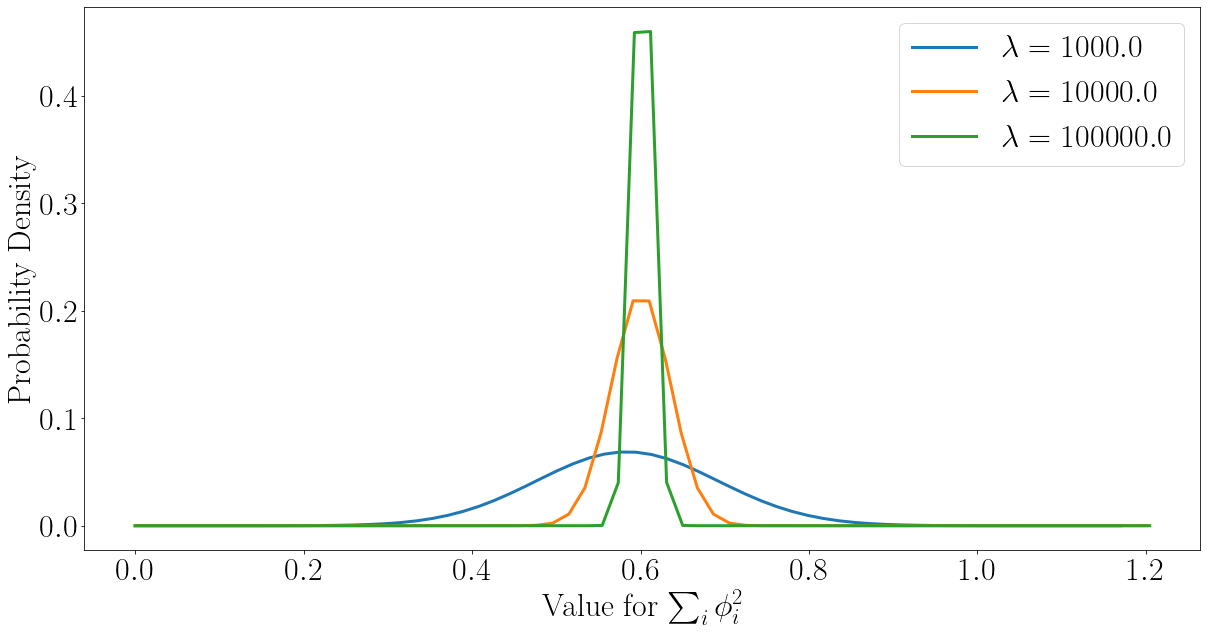

In [26]:
fig,ax = plt.subplots()

plot_psq_dist("16x16x16x32", 1000.0, fig, ax)
plot_psq_dist("16x16x16x32", 10000.0, fig, ax)
plot_psq_dist("16x16x16x32", 100000.0, fig, ax)